# kNN (k-Nearest Neighbors)

It's a simple algorithm used for classification and regression tasks. The principle is straightforward: for a given query point, find the k nearest data points and let them vote for the classification (in case of classification) or average their values (in case of regression). It's a non-parametric method, meaning it doesn't make any assumptions on the underlying data distribution.

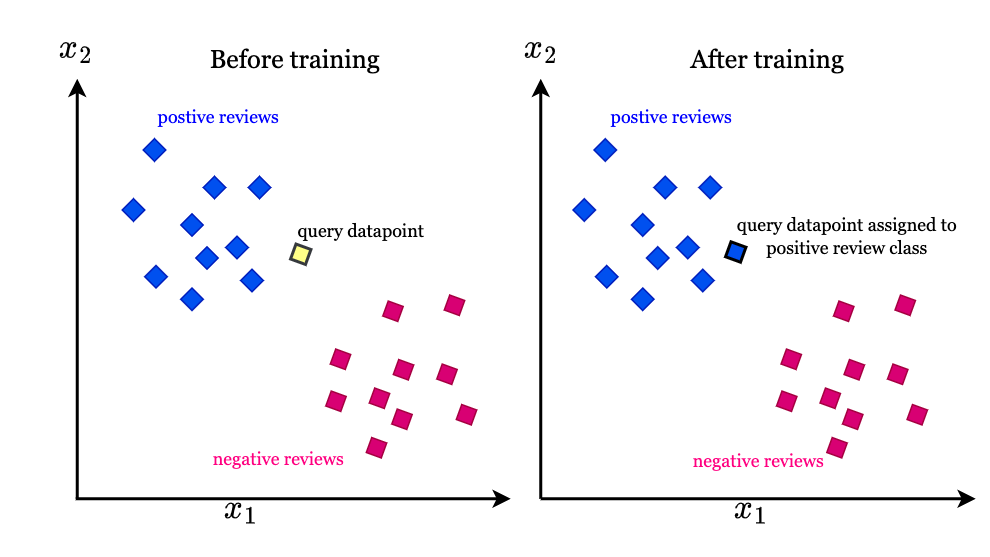

In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from ipywidgets import interact, fixed
from matplotlib.colors import ListedColormap


In [2]:
df = pd.read_csv('Breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(columns=['id','Unnamed: 32'],inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0],test_size=0.2, random_state=2)

In [6]:
X_test.shape

(114, 30)

In [7]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
knn = KNeighborsClassifier(n_neighbors=4)

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [22]:
y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.9736842105263158

In [23]:
scores = []

for i in range(1,16):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    y_pred = knn.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))

scores

[0.956140350877193,
 0.9736842105263158,
 0.9912280701754386,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9649122807017544,
 0.9649122807017544]

In [27]:
scores[4]

0.9736842105263158

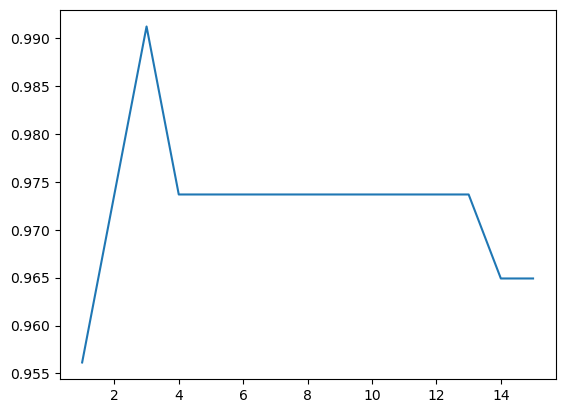

In [24]:
plt.plot(range(1,16),scores)

In [25]:
def load_data():
    cancer = datasets.load_breast_cancer()
    return cancer

def plot_decision_boundaries(n_neighbors, data, labels):
    h = .02
    cmap_light = ListedColormap(['orange', 'blue'])
    cmap_bold = ListedColormap(['darkorange', 'darkblue'])

    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(data, labels)

    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'2-Class classification (k = {n_neighbors})')
    plt.show()

cancer = load_data()

# Use only the first two features and standardize them.
X = StandardScaler().fit_transform(cancer.data[:, :2])
y = cancer.target

# Interactive widget
interact(plot_decision_boundaries, n_neighbors=(1, 20), data=fixed(X), labels=fixed(y));


interactive(children=(IntSlider(value=10, description='n_neighbors', max=20, min=1), Output()), _dom_classes=(…

# key limitations of kNN

Computational Complexity: As the size of the dataset grows, the computational cost of kNN increases because it requires calculating the distances between the query point and all other points in the dataset. This can make it inefficient for large datasets.

Memory Usage: kNN stores the entire training dataset, which can be memory-intensive, especially for large datasets.

Sensitive to Feature Scaling: Since kNN relies on distance measures, it is sensitive to the scale of features. Features with larger scales may dominate the distance calculations, leading to biased results.

Need for Optimal k: Choosing the right value of k (number of neighbors) is crucial. A small k can lead to overfitting, while a large k can lead to underfitting.

Imbalanced Data: In datasets where classes are imbalanced, kNN tends to favor the majority class, leading to biased predictions.

# When to use?

Small to Medium Sized Datasets: kNN performs well on datasets with a small to medium number of samples, where computational costs are manageable.

Non-linear Data: kNN is effective for non-linear data as it doesn't make assumptions about the underlying data distribution.

Noisy Data: kNN can handle noisy data and outliers to some extent, as it relies on local information rather than global structure.

Simple Classification or Regression Problems: For simple classification or regression tasks where interpretability is important, kNN can be a suitable choice.

Lazy Learning: kNN is an example of lazy learning, meaning it doesn't require a training phase. This makes it suitable for scenarios where the data distribution is changing over time.

In summary, kNN is a straightforward and versatile algorithm, but its performance depends on the specific characteristics of the dataset and the problem at hand. It's essential to consider its limitations and suitability for your particular use case before applying it.

# SVM(Spport Vector Mechine)

Think of SVM as a smart line-drawer. Imagine you have some points on a piece of paper, and you want to draw a line to separate them into different groups. SVM helps you draw this line in the best way possible.

Line Drawing: SVM finds the best line (or plane in higher dimensions) to separate different groups of points. It tries to draw this line so that it's as far away as possible from the nearest points of each group.

Margin: The space between the line and the nearest points of each group is called the margin. SVM tries to maximize this space because a bigger margin means a better line.

Support Points: The points that are closest to the line are called support points. They are the ones that matter the most in drawing the line. SVM focuses on these points to find the best line.

Trick for Curvy Data: Sometimes, the points are not easily separable by a straight line. SVM can handle this by using a trick. Instead of drawing a straight line, it uses a trick to bend the line in such a way that it can separate the points.

Balancing Act: SVM also balances between making sure every point is on the correct side of the line and having a big margin. It does this balancing act using a parameter called C.

Handling Many Groups: Even though SVM is good at drawing lines for two groups, what if you have more than two groups? SVM can handle this too. It basically draws multiple lines, each separating one group from the rest.

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

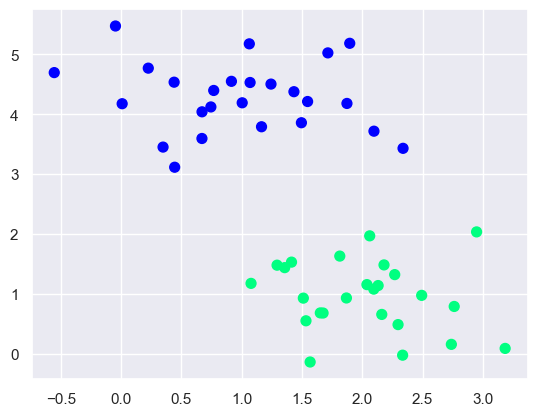

In [22]:
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plt.show()

In [23]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

In [24]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

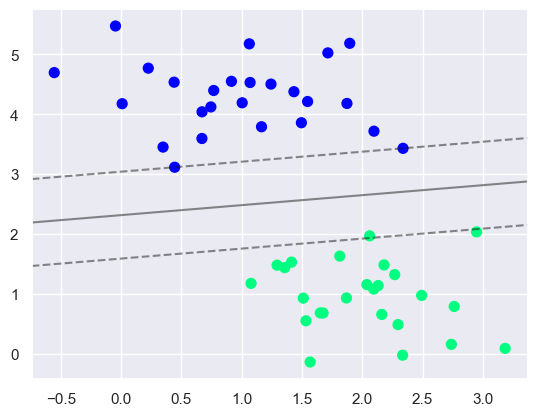

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);

# Working with Almost Linearly Separable Dataset

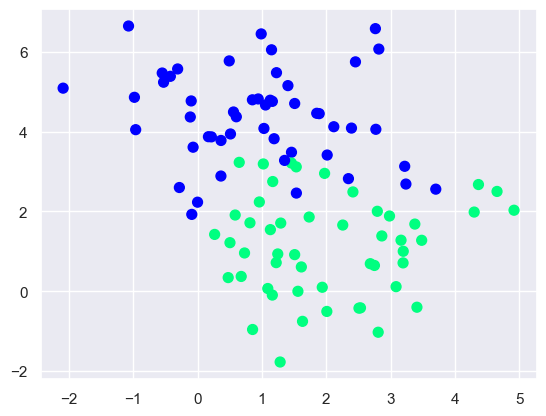

In [26]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

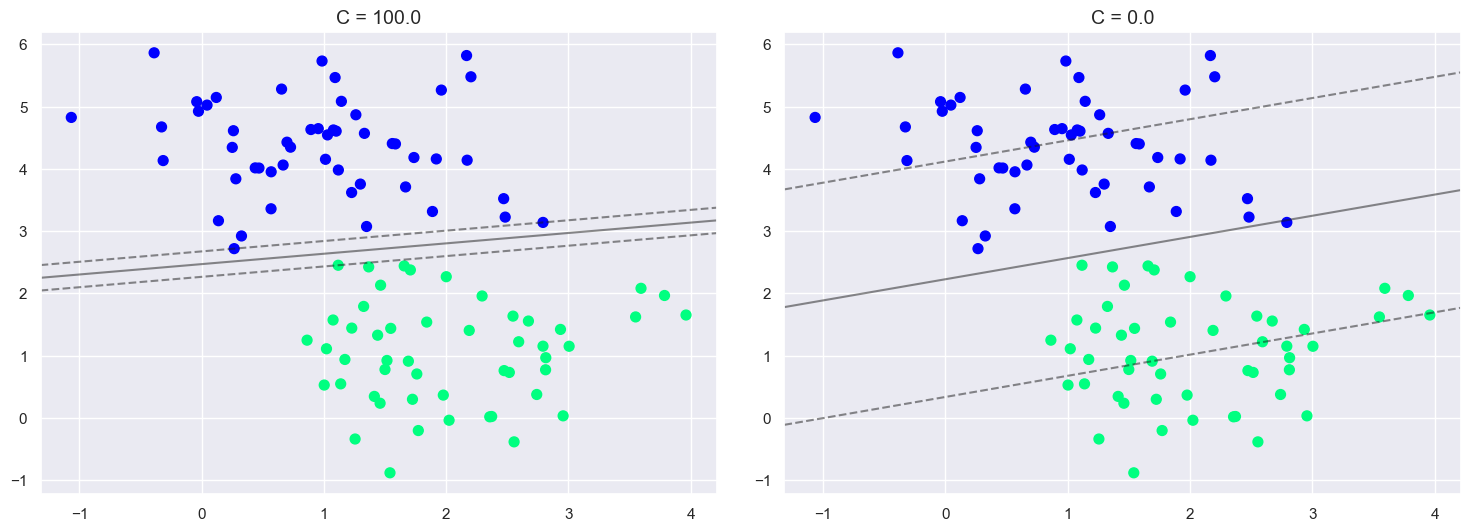

In [27]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

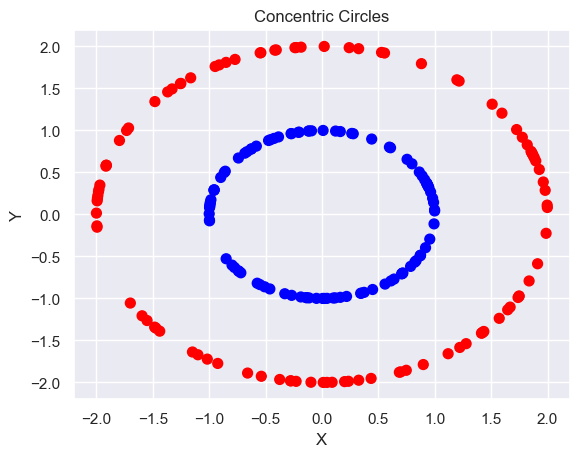

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points per circle
num_points = 100

# Radius of the inner and outer circles
inner_radius = 1.0
outer_radius = 2.0

# Generate random angles for points
angles = np.random.rand(num_points) * 2 * np.pi

# Generate points for the inner circle
inner_x = inner_radius * np.cos(angles)
inner_y = inner_radius * np.sin(angles)

# Generate points for the outer circle
outer_x = outer_radius * np.cos(angles)
outer_y = outer_radius * np.sin(angles)

# Concatenate points for both circles
X = np.vstack([np.concatenate([inner_x, outer_x]), np.concatenate([inner_y, outer_y])]).T

# Generate labels (0 for inner circle, 1 for outer circle)
y = np.hstack([np.zeros(num_points), np.ones(num_points)])

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Concentric Circles')
plt.show()


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [31]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4

In [33]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\Vishal\AppData\Local\Temp\ipykernel_17536\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


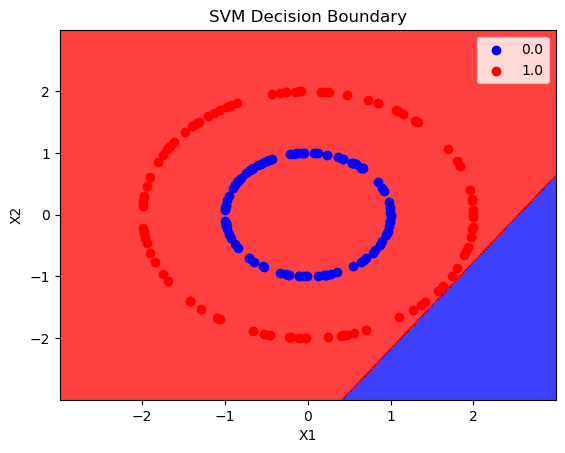

In [8]:
plot_decision_boundary(X, y, classifier)

In [34]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

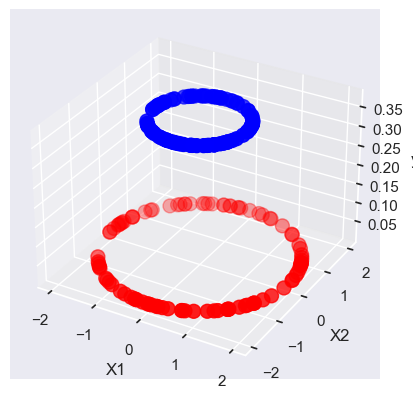

In [35]:
plot_3d_plot(X,y)

In [36]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\Vishal\AppData\Local\Temp\ipykernel_11468\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


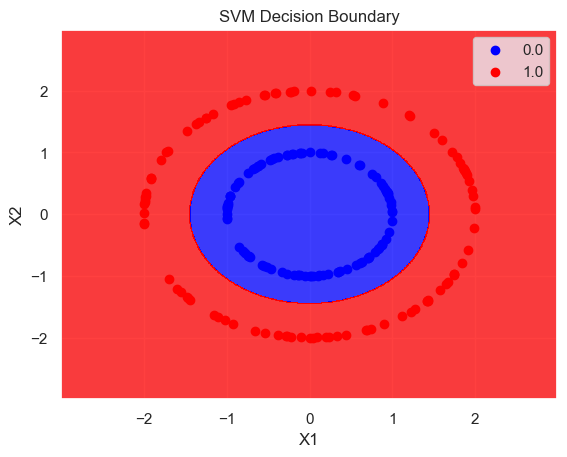

In [38]:
plot_decision_boundary(X, y, rbf_classifier)

In [39]:
X_new=np.exp(-(X**2))

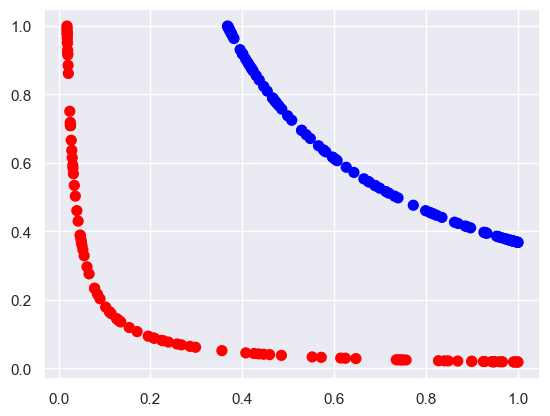

In [40]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')

# When to Use SVMs

Binary Classification: SVMs are particularly effective for binary classification tasks when the data is linearly separable or can be transformed into a linearly separable space.

Small to Medium-sized Datasets: SVMs can handle small to medium-sized datasets efficiently. They perform well even with a limited amount of data.

High-dimensional Data: SVMs can handle high-dimensional data effectively, making them suitable for tasks like image classification or text categorization.

Non-linear Data: With appropriate kernel functions (like polynomial, radial basis function, etc.), SVMs can capture complex non-linear relationships in the data.

When Interpretability is Not a Priority: If the main goal is predictive accuracy rather than interpretability of the model, SVMs can be a good choice.

When Regularization is Needed: SVMs naturally incorporate regularization parameters which help prevent overfitting, making them suitable for situations where overfitting is a concern.

# When to Avoid SVMs

Large Datasets: Training SVMs on large datasets can be computationally expensive and time-consuming. Other algorithms like stochastic gradient descent or deep learning might be more suitable for such scenarios.

Data with Noise: SVMs are sensitive to noise in the data, especially when using a high-dimensional feature space. In such cases, preprocessing techniques or other algorithms may be more robust.

Imbalanced Datasets: SVMs can struggle with imbalanced datasets, where one class is significantly more prevalent than the other(s). Techniques like class weighting or using different evaluation metrics might be necessary.

Non-linear Data without Proper Kernel Choice: While SVMs can handle non-linear data with appropriate kernel functions, choosing the right kernel and tuning its parameters can be challenging. In such cases, simpler non-linear models might be preferable.

Large Number of Features: If the dataset has a very large number of features relative to the number of samples, SVMs might not perform well due to the "curse of dimensionality". In such cases, feature selection or dimensionality reduction techniques might be necessary.

When Explainability is Important: If the model's decisions need to be easily explained to stakeholders or users, SVMs might not be the best choice due to their complex nature.